In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy import linalg
import numpy as np

In [2]:
# define data here
n_samples = 8
# n_features=3 is maximum for plotting the data
n_features = 3 
centers = 3
cluster_std = 0.2

In [3]:
x, y = datasets.make_blobs( n_samples, n_features, centers=centers, cluster_std=cluster_std )
# order X by cluster groups
nx = []
ny = []
for c in range( centers ):
    for i in range( n_samples ):
        if y[i] == c:
            nx.append( x[i] )
            ny.append( y[i] )
x = np.array( nx )
y = np.array( ny )

x, y

(array([[ 4.99883622,  0.05998999, -2.5877403 ],
        [ 4.94584327,  0.27806493, -2.7165853 ],
        [ 5.13049261,  0.11981134, -2.2800136 ],
        [ 3.17665968,  7.4955073 , -9.35115633],
        [ 3.29676233,  7.57471929, -9.58964671],
        [ 3.1884817 ,  7.88485916, -8.97920402],
        [ 7.75277162,  5.71893971, -4.7730869 ],
        [ 7.69093087,  6.27089494, -4.80799354]]),
 array([0, 0, 0, 1, 1, 1, 2, 2]))

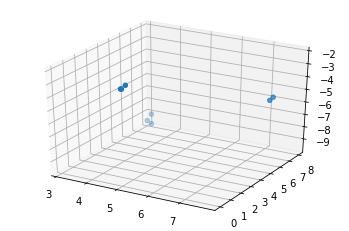

In [4]:
fig = plt.figure()
ax = fig.add_subplot( 111, projection='3d' )

x_vals = x[:, 0]
y_vals = x[:, 1]
z_vals = x[:, 2]
ax.scatter( x_vals, y_vals, z_vals )
plt.show()

In [5]:
df = pd.DataFrame( x )
smm = np.array( squareform( pdist( df ) ) )
smm.shape

(8, 8)

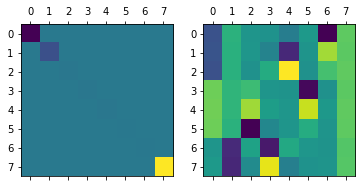

(array([-29.97750422, -11.856765  ,  -0.74162388,  -0.5446056 ,
         -0.50694096,  -0.26196086,  -0.22280501,  44.11220553]),
 array([[-4.14932991e-01,  1.91049225e-01,  5.03467553e-03,
         -1.29211056e-02, -1.46364423e-01,  2.71547526e-02,
         -7.99179028e-01,  3.60959084e-01],
        [-4.02124617e-01,  1.79662104e-01,  6.67480159e-03,
         -1.14166213e-01, -6.24709386e-01, -5.55639390e-03,
          5.27284665e-01,  3.53011381e-01],
        [-4.19167033e-01,  1.77993084e-01, -2.03903915e-02,
          1.45440269e-01,  7.43951140e-01, -2.11182265e-02,
          2.86663326e-01,  3.67374033e-01],
        [ 4.03221357e-01,  2.10658633e-01,  2.58887882e-01,
          6.13831914e-03, -7.07041141e-03, -7.73539971e-01,
         -2.14261137e-02,  3.56513264e-01],
        [ 4.09234168e-01,  2.10169097e-01,  5.24520601e-01,
          5.84241291e-02,  1.18886523e-02,  6.13634969e-01,
          2.32649045e-02,  3.64129971e-01],
        [ 3.99454063e-01,  1.83591452e-01, -8.0406

In [6]:
w, v = np.linalg.eigh( smm )

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(np.diag(w))
ax2.matshow(v)
plt.show()

w, v

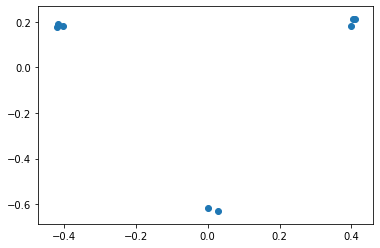

In [7]:
cut_v = v[:, 0:2]
# plt.matshow( nv )
# plt.show()

new_coordinates = []
for i in range( n_samples ):
    new_coordinates.append( cut_v[i, :].tolist() )
new_coordinates = np.array( new_coordinates )

x_vals = new_coordinates[:, 0]
y_vals = new_coordinates[:, 1]

plt.scatter( x_vals, y_vals )
plt.show()

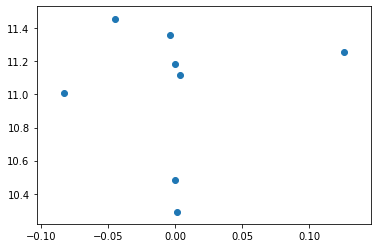

In [8]:
evalues = w[n_samples-2:n_samples]
evector = v[:, n_samples-2:n_samples]

evalues *= np.sqrt(1/2)
evalues = np.diag( evalues )

x = evector @ evalues

x_vals = x[:, 0]
y_vals = x[:, 1]

plt.scatter( x_vals, y_vals )
plt.show()